<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/bigcon/blob/master/Code_Merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from scipy import stats
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
original = pd.read_excel('./performance.xlsx', header=1)
original['날짜'] = pd.to_datetime(original['방송일시']).dt.date
original = original[original['상품군']!='무형']

In [3]:
train = pd.read_excel('/content/drive/My Drive/빅콘폴더/train.xlsx')
train = train[train['판매단가'] < train['취급액']]

In [4]:
train['노출(분)'] = train['노출(분)'].replace(0, math.nan)
train['노출(분)'] = train['노출(분)'].fillna(method='ffill')

In [6]:
total = pd.read_excel('/content/drive/My Drive/빅콘폴더/2020_bigcontest_champion_performance.xlsx', header=1)
total = total[total['상품군']!='무형'] 
total = total[total['판매단가'] < total['취급액']]
total['날짜'] = pd.to_datetime(total['방송일시']).dt.date
total['날짜'] = pd.to_datetime(total['날짜'])
total['주문량'] = total['취급액']/total['판매단가']
total["요일"]=total["방송일시"].dt.dayofweek # 요일
total["시"]=total["방송일시"].dt.hour # 시
total['월'] = total['방송일시'].dt.month # 월

In [7]:
data = pd.read_excel('/content/drive/My Drive/빅콘폴더/2020_bigcontest_champion_performance.xlsx', header=1)
data = data[data['상품군']!='무형'] 
data = data[data['판매단가'] < data['취급액']]
data['날짜'] = pd.to_datetime(data['방송일시']).dt.date
data['날짜'] = pd.to_datetime(data['날짜'])
data['주문량'] = data['취급액']/data['판매단가']
data["요일"]=data["방송일시"].dt.dayofweek # 요일
data["시"]=data["방송일시"].dt.hour # 시
data['월'] = data['방송일시'].dt.month # 월
weekday = {"월":0,"화":1,"수":2,"목":3,"금":4,"토":5,"일":6}

In [8]:
data = data.fillna(method='ffill')

In [9]:
data = data.iloc[17604:25792]

In [10]:
test = pd.read_excel('/content/drive/My Drive/빅콘폴더/test.xlsx', header=1)

In [11]:
total['계절'] = 0

In [12]:
for i in total.index:
    if 3 <= total['월'][i] <= 5:
        total['계절'][i] = 1
    elif 6 <= total['월'][i] <= 8:
        total['계절'][i] = 2
    elif 9 <= total['월'][i] <= 11:
        total['계절'][i] = 3
    else:
        total['계절'][i] = 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ""

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text

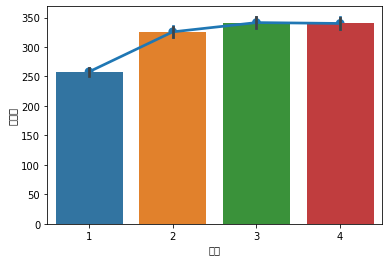

In [ ]:
#계절별 주문량 그래프 3(가을)에 제일 많고 1(봄)에 제일 적다.
sns.pointplot(data=total,x="계절",y="주문량") 
sns.barplot(data=total,x="계절",y="주문량")

In [ ]:
data.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,주문량,요일,시,월
17373,2019-06-15 00:00:00,20.0,100305,200981,오모떼 미라클쉐이핑 브라팬티 시즌3,속옷,119000,16517000,2019-06-15,138.798319,5,0,6
17374,2019-06-15 00:20:00,20.0,100305,200981,오모떼 미라클쉐이핑 브라팬티 시즌3,속옷,119000,44829000,2019-06-15,376.714286,5,0,6
17375,2019-06-15 00:40:00,20.0,100305,200981,오모떼 미라클쉐이핑 브라팬티 시즌3,속옷,119000,56057000,2019-06-15,471.067227,5,0,6
17376,2019-06-15 01:00:00,30.0,100374,201202,USPA 남성 폴로셔츠 위켄드 컬렉션 3종,의류,69000,9996000,2019-06-15,144.869565,5,1,6
17377,2019-06-15 01:00:00,30.0,100374,201206,USPA 여성 폴로셔츠 위켄드 컬렉션 3종,의류,69000,9409000,2019-06-15,136.362319,5,1,6


#날씨

In [13]:

# 대표 지역들
places = ["강릉","광주","부산","수원","울산","대구","대전","서울","파주"] 
weather = pd.read_excel("/content/drive/My Drive/빅콘폴더/날씨_실제/강릉날씨.xlsx")
row_num = weather.shape[0]
weather["지역"]=["강릉"]*row_num

In [15]:
# 모든 지역 날씨 데이터 세로로 합치기
for p in places[1:]:
    a=pd.read_excel(f"/content/drive/My Drive/빅콘폴더/날씨_실제/{p}날씨.xlsx")
    a["지역"]=[p]*row_num
    weather = pd.concat([weather, a], axis=0)

In [16]:
# "-" -> 0값으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].replace("-",0)
weather["신적설(cm)"]=weather["신적설(cm)"].replace("-",0)
weather["운량(1/10)"]=weather["운량(1/10)"].replace("-",0)

# object 형 float 형으로 변경
weather["강수량(mm)"]=weather["강수량(mm)"].astype(float)
weather["신적설(cm)"]=weather["신적설(cm)"].astype(float)
weather["운량(1/10)"]=weather["운량(1/10)"].astype(float)

In [17]:
weather = weather.reset_index()

In [18]:
# 날짜 set 맞추기
new_weather = pd.DataFrame()
new_weather = weather.iloc[165:243]
new_weather = pd.concat([new_weather, weather.iloc[753:831]])
new_weather = pd.concat([new_weather, weather.iloc[1341:1419]])
new_weather = pd.concat([new_weather, weather.iloc[1929:2007]])
new_weather = pd.concat([new_weather, weather.iloc[2517:2595]])
new_weather = pd.concat([new_weather, weather.iloc[3105:3183]])
new_weather = pd.concat([new_weather, weather.iloc[3693:3771]])
new_weather = pd.concat([new_weather, weather.iloc[4281:4359]])
new_weather = pd.concat([new_weather, weather.iloc[4869:4947]])

In [19]:
# 서울 날씨와 강릉, 부산 날씨로 칼럼별 주문량 상관성 확인 및 지역별 날씨의 영향도 확인
gang_weather = new_weather.loc[new_weather["지역"]=="강릉",:]
seoul_weather = new_weather.loc[new_weather["지역"]=="서울",:]
busan_weather = new_weather.loc[new_weather["지역"]=="부산",:]
suwon_weather = new_weather.loc[new_weather["지역"]=="수원",:]
sudogwon_weather = new_weather.loc[(new_weather["지역"]=="서울")|(weather["지역"]=="수원"),:]

In [20]:
day_data = data.copy()

In [21]:
day_data['날짜'] = pd.to_datetime(day_data['날짜'])
new_weather['날짜'] = pd.to_datetime(new_weather['날짜'])

In [22]:
all_data = day_data.merge(new_weather, on='날짜')
all_data = all_data.groupby(['날짜']).mean()

In [23]:
sudogwon_weather['날짜'] = pd.to_datetime(sudogwon_weather['날짜'] )
seoul_weather['날짜'] = pd.to_datetime(seoul_weather['날짜'] )
busan_weather['날짜'] =pd.to_datetime(busan_weather['날짜'] )
suwon_weather['날짜'] = pd.to_datetime(suwon_weather['날짜'] )
gang_weather['날짜'] = pd.to_datetime(gang_weather['날짜'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [24]:
sudogwon_data = day_data.merge(sudogwon_weather, on="날짜")
suwon_data = day_data.merge(suwon_weather, on="날짜")
seoul_data = day_data.merge(seoul_weather, on="날짜")
busan_data = day_data.merge(busan_weather, on="날짜")
gang_data = day_data.merge(gang_weather, on="날짜")

In [25]:
# 시각화를 용이하게 하기 위한 데이터 전처리 함수
def preprocessing(data, bins=4):
    # 강수유무, 눈유무는 0,1 로 -> 비가오거나 눈이 쌓이면 1, 비가 오지 않거나 눈이 쌓이지 않으면 0
    data["강수유무"]=True
    data.loc[data["강수량(mm)"]!=0,"강수유무"]=1
    data.loc[data["강수량(mm)"]==0,"강수유무"]=0

    data["눈유무"]=True
    data.loc[data["신적설(cm)"]!=0,"눈유무"]=1
    data.loc[data["신적설(cm)"]==0,"눈유무"]=0

    # 나머지 칼럼은 6구간으로 나누기
    cate_columns= ["평균기온","최고기온","최저기온",'평균풍속(m/s)','평균습도(%)', '운량(1/10)', '일조시간(Hr)',"강수량(mm)","신적설(cm)"]
    
    for col in cate_columns:
        data[col]=pd.cut(data[col],bins)

In [26]:

# 데이터 전처리
for d in [all_data, seoul_data, busan_data, gang_data, sudogwon_data]:
    preprocessing(d,4)

In [27]:
# 시각화
visual_columns = all_data.columns[9:] # 시각화를 원하는 칼럼
visual_columns

Index(['index', '평균기온', '최고기온', '최저기온', '강수량(mm)', '신적설(cm)', '평균풍속(m/s)',
       '평균습도(%)', '운량(1/10)', '일조시간(Hr)', '강수유무', '눈유무'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

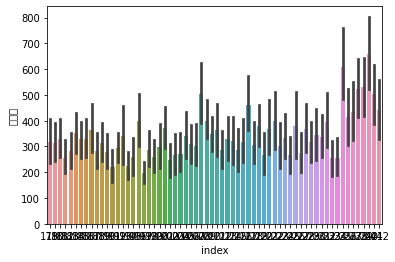

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_te

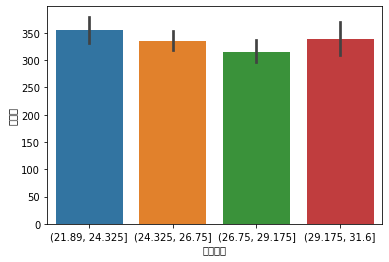

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)


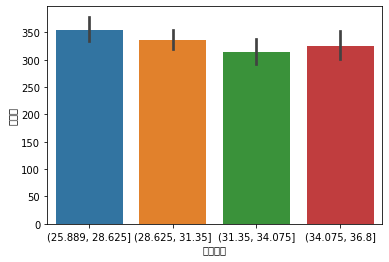

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)


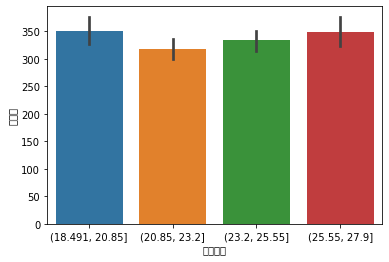

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


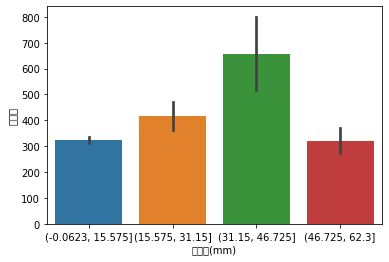

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text

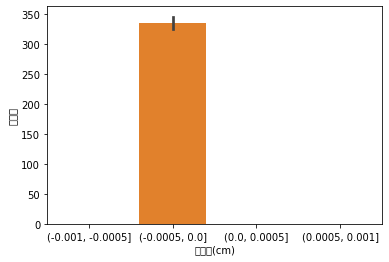

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49549 missing from current font.
  font.set_text(s, 0, flags=flags)


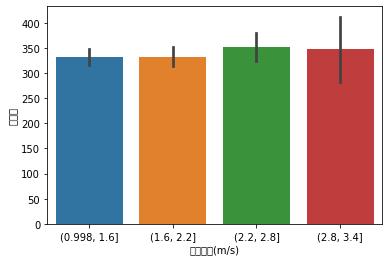

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


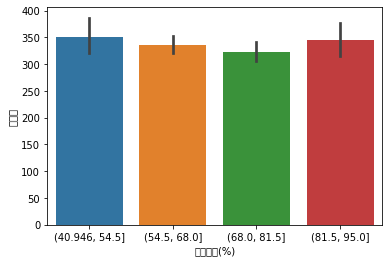

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0, flags=flags)


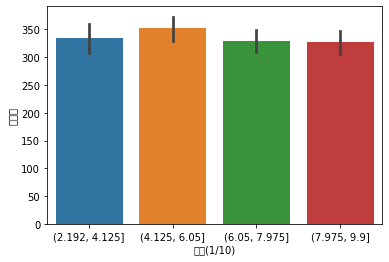

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_te

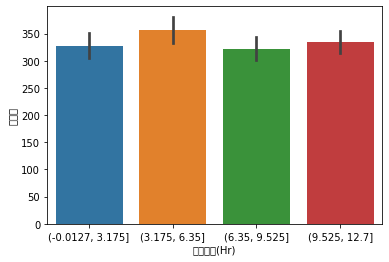

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47924 missing from current font.
  font.set_text(s, 0, flags=flags)


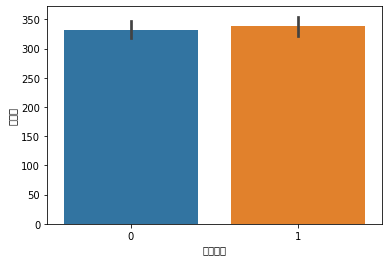

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45576 missing from current font.
  font.set_text(s, 0, flags=flags)


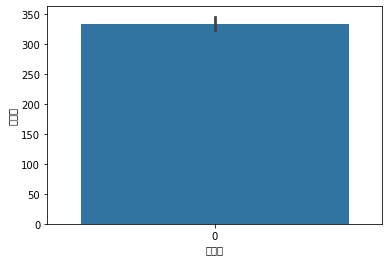

In [28]:
for col in visual_columns:
    sns.barplot(x=col, y="주문량", data=seoul_data)
    #plt.savefig(f'./날씨그래프/{col[:4]}.png') # 그래프 저장
    plt.show()

In [ ]:
'''
# 요일성을 제거하고 특정 월에 대해서만 시각화
seoul_data["월"]=pd.to_datetime(seoul_data["방송일시"]).dt.month
a = seoul_data.loc[((seoul_data["요일"]!=5)&(seoul_data["요일"]!=6))&(seoul_data["월"]==7),:]
a["범주_습도"]=pd.cut(a["평균습도(%)"],4)
sns.barplot(x="범주_습도", y="주문량", data=a)
'''

In [29]:
display(seoul_data.iloc[:,9:12].corr())
display(busan_data.iloc[:,9:12].corr())
display(gang_data.iloc[:,9:12].corr())

,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


,주문량,요일,시
주문량,1.000000,0.017263,-0.098928
요일,0.017263,1.000000,-0.021874
시,-0.098928,-0.021874,1.000000


In [30]:
# 범주 시각화 함수
def visual(col):
    global a
    # 토,일 제외함으로써 요일성 제외
    a = train_1.loc[(train_1["요일"]!=5)&(train_1["요일"]!=6),:] 
    # 연속형 데이터를 범주형으로 변경
    a[f"범주_{col}"]=pd.cut(a[col],3) 
    sns.barplot(x=f"범주_{col}",y="주문량", data=a)
    plt.show()

In [ ]:
fc_prop = pd.read_csv("/날씨예보/서울날씨/강수확률.csv")
fc_amount = pd.read_csv("/날씨예보/서울날씨/6시간 강수량.csv") 
fc_sky = pd.read_csv("/날씨예보/서울날씨/하늘상태.csv")
fc_top = pd.read_csv("/날씨예보/서울날씨/일최고기온.csv")
fc_bottom = pd.read_csv("/날씨예보/서울날씨/일최저기온.csv")

In [ ]:
forecast_data = {"강수확률":fc_prop, "강수량":fc_amount,"하늘상태":fc_sky, "일최고기온":fc_top, "일최저기온":fc_bottom}

In [ ]:
forecast = pd.DataFrame()

for name, fcdata in forecast_data.items():
    amount_list=[]
    cycle = (fcdata.shape[0])//365 # 하루 관측량
    for i in range(365):
        day_weather = fcdata.iloc[i*cycle:(i+1)*cycle,-1].mean()
        amount_list.append(day_weather)
    forecast[name]=amount_list

In [ ]:
forecast = forecast.iloc[165:243]

In [ ]:
# 날짜 칼럼 추가
forecast["날짜"]=train["날짜"].unique()

In [ ]:
train_1 = data.copy()
train_1 = train_1.merge(forecast, on='날짜')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48276 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from cu

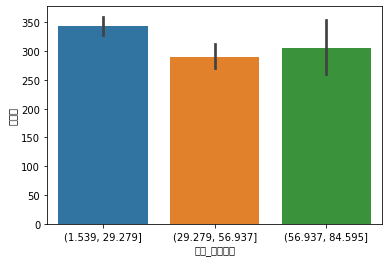

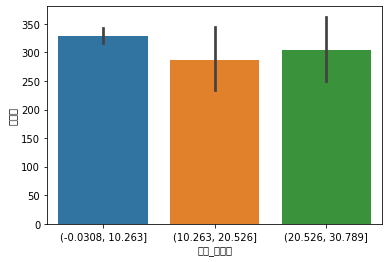

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45720 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45720 missing from current font.
  font.set_te

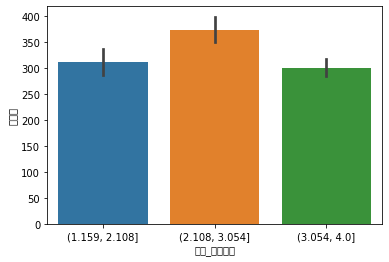

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

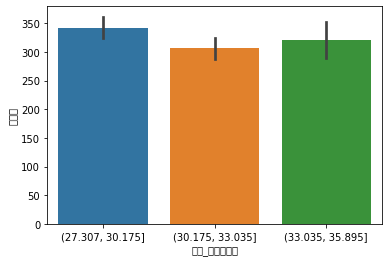

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0, flags=flags)


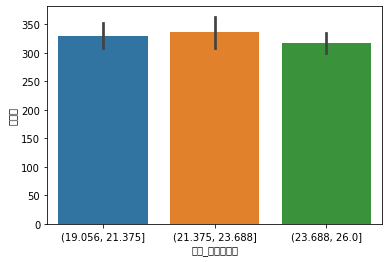

In [ ]:
for name in forecast_data.keys():
    visual(name)

#미세먼지

In [36]:
munji = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019미세먼지.xlsx')
pop_tot = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019총인구비율(수정).xlsx')
pop_w = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019여성인구비율.xlsx')
pop_m = pd.read_excel('/content/drive/My Drive/빅콘폴더/인구 미세먼지관련/2019남자인구비율.xlsx')

In [37]:
MonthItemGroup = train.groupby(['상품군','월']).mean()
MonthItemGroup

Unnamed: 0      노출(분)  ...  MONTH       HOUR
상품군       월                           ...                  
beauty    6  18219.250000  23.150000  ...    6.0  13.650000
          7  20736.884211  20.210526  ...    7.0  12.242105
          8  24010.888889  17.469136  ...    8.0   6.395062
bedding   6  18243.551724  20.000000  ...    6.0  12.517241
          7  20179.016393  19.918033  ...    7.0  12.360656
          8  24510.500000  20.000000  ...    8.0  13.250000
cloth     6  18129.981752  20.740876  ...    6.0  10.489051
          7  20783.081851  19.697509  ...    7.0   9.298932
          8  23785.387833  17.532319  ...    8.0   9.882129
elec      6  17951.152709  21.477833  ...    6.0  19.359606
          7  20474.908096  19.321663  ...    7.0  21.240700
          8  23642.274011  20.000000  ...    8.0  19.968927
etc       6  18305.559701  20.000000  ...    6.0   6.955224
          7  20849.561404  23.059211  ...    7.0   9.706140
          8  23711.907767  23.046117  ...    8.0  10.929612
food      6  18176.581818  20.118182  ...    6.0  16.254545
          7  20676.000000  19.941520  ...    7.0  15.640351
          8  24129.831014  19.860835  ...    8.0  15.377734
furniture 6  18181.358696  20.000000  ...    6.0  20.967391
          7  20420.643617  20.000000  ...    7.0  21.632979
          8  23578.060773  20.000000  ...    8.0  21.138122
health    6  18273.500000  19.883333  ...    6.0  11.650000
          7  20560.086957  19.927536  ...    7.0  11.260870
          8  24193.914894  20.000000  ...    8.0  10.361702
inner     6  18151.587940  20.562814  ...    6.0  14.407035
          7  20432.713115  19.459016  ...    7.0  13.418033
          8  23907.338658  19.709265  ...    8.0  11.642173
life      6  18191.071429  18.107143  ...    6.0   7.357143
          7  20994.962687  22.694030  ...    7.0  12.470149
          8  23997.876866  25.335821  ...    8.0  15.559701
living    6  18224.980159  21.190476  ...    6.0  14.313492
          7  20505.862745  20.597148  ...    7.0  12.966132
          8  23838.762821  20.376068  ...    8.0  14.104701

[33 rows x 46 columns]

In [38]:
categories = MonthItemGroup.index.get_level_values(0).unique()
categories

Index(['beauty', 'bedding', 'cloth', 'elec', 'etc', 'food', 'furniture',
       'health', 'inner', 'life', 'living'],
      dtype='object', name='상품군')

In [39]:
for i in categories:
  globals()['month_{}'.format(i)] = MonthItemGroup.xs(i)['주문량']
month_beauty

월
6    734.573814
7    782.083530
8    490.864757
Name: 주문량, dtype: float64

In [40]:
def weighted_munji(munji_data,population_data): 
    weighted_df = pd.DataFrame()
    weighted_df = pd.DataFrame().reindex_like(munji_data)
    for i in range(len(munji_data.index)):
        for j in range(len(munji_data.columns)):
            weighted_df.iloc[i][j] = munji_data.iloc[i][j]*population_data.iloc[i][j]
    return weighted_df

In [41]:

#모든 카테고리와의 상관계수 결과 반환해줌
def cor_with_categories(data): 
    results = []
    results.append(stats.linregress(month_bedding,data.iloc[month_bedding.index-1]))
    results.append(stats.linregress(month_furniture,data.iloc[month_furniture.index-1]))
    results.append(stats.linregress(month_health,data.iloc[month_health.index-1]))
    results.append(stats.linregress(month_food,data.iloc[month_food.index-1]))
    results.append(stats.linregress(month_life,data.iloc[month_life.index-1]))
    results.append(stats.linregress(month_inner,data.iloc[month_inner.index-1]))
    results.append(stats.linregress(month_cloth,data.iloc[month_cloth.index-1]))
    results.append(stats.linregress(month_beauty,data.iloc[month_beauty.index-1]))
    results.append(stats.linregress(month_etc,data.iloc[month_etc.index-1]))
    results.append(stats.linregress(month_living,data.iloc[month_living.index-1]))
    print('침구,가구,건강기능,농수축,생활용품,속옷,의류,이미용,잡화,주방')
    
    return results

In [42]:
munji_df = munji.set_index('지역날짜')
pop_tot_df = pop_tot.set_index('행정구역(시군구)별')

In [43]:
tot_weight_munji = weighted_munji(munji_df, pop_tot_df)

In [44]:
tot_munji_df = tot_weight_munji.sum()
tot_munji_df

2019. 01    24.837347
2019. 02    22.833675
2019. 03    27.869383
2019. 04    13.450065
2019. 05    18.012409
2019. 06    12.980445
2019. 07    11.941034
2019. 08    11.264766
2019. 09     8.645412
2019. 10    10.491966
2019. 11    13.959968
2019. 12    18.588743
dtype: float64

In [45]:
# 봄(3,4,5)월엔 상관계수가 높지만 train기간인 6,7,8월은 낮다.
stats.linregress(tot_munji_df[2:5], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=5.395970481258863, intercept=270.4579752494558, rvalue=0.42373746610642643, pvalue=0.7214358303523076, stderr=11.53447545258167)

In [46]:
# 6,7,8 월만 전체인구수가중한것과 건강기능 상관계수
stats.linregress(tot_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=99.30943820204276, intercept=-820.7029264126979, rvalue=0.9144962032725028, pvalue=0.26517464159491627, stderr=43.93681513571076)

In [47]:
pop_w_df = pop_w.set_index('행정구역(시군구)별')

In [48]:
woman_weight_munji = weighted_munji(munji_df, pop_w_df)

In [49]:
woman_munji_df = woman_weight_munji.sum()
woman_munji_df

2019. 01    12.484569
2019. 02    11.481677
2019. 03    14.014574
2019. 04     6.766506
2019. 05     9.061288
2019. 06     6.532986
2019. 07     6.008642
2019. 08     5.665599
2019. 09     4.347492
2019. 10     5.275934
2019. 11     7.020567
2019. 12     9.352337
dtype: float64

In [50]:
stats.linregress(woman_munji_df[5:8], MonthItemGroup.xs('health')['주문량'])

LinregressResult(slope=196.5989557714752, intercept=-815.9983069564603, rvalue=0.915102904851042, pvalue=0.2642183874640637, stderr=86.62709397289866)

In [51]:
pop_m_df = pop_m.set_index('행정구역(시군구)별')

In [52]:
mix_weight_munji = 0.2*weighted_munji(munji_df, pop_m_df) +\
                    0.8*weighted_munji(munji_df, pop_w_df)

In [53]:
mix_munji_df = mix_weight_munji.sum()
mix_munji_df

2019. 01    12.458211
2019. 02    11.455741
2019. 03    13.982621
2019. 04     6.749916
2019. 05     9.039254
2019. 06     6.515881
2019. 07     5.993392
2019. 08     5.652313
2019. 09     4.337577
2019. 10     5.263954
2019. 11     7.004334
2019. 12     9.329150
dtype: float64

#월별/요일별

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

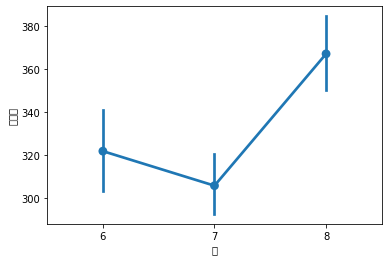

In [ ]:
sns.pointplot(data=train,x="월",y="주문량")

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

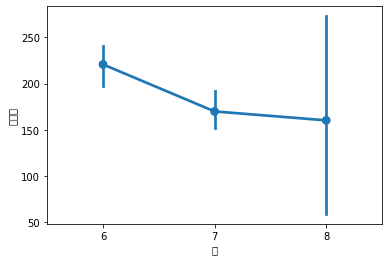

In [ ]:
sns.pointplot(data=train[train['상품군']=='bedding'],x="월",y="주문량")

In [ ]:
len(train[(train['상품군']=='bedding')&(train['월']==8)])

12

In [ ]:
train['상품군'].value_counts()

living       1281
elec         1014
etc          1002
food          955
inner         878
cloth         818
furniture     461
life          430
bedding       282
beauty        216
health        176
Name: 상품군, dtype: int64

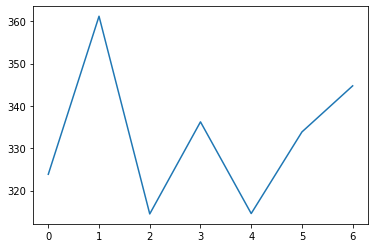

In [ ]:
plt.plot(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count())

In [ ]:
(train.groupby("요일")["주문량"].sum()/train.groupby("요일")["주문량"].count()).describe()

count      7.000000
mean     332.715900
std       16.869934
min      314.504503
25%      319.230204
50%      333.862742
75%      340.498297
max      361.187054
Name: 주문량, dtype: float64

In [ ]:
train['상품군'].value_counts()

living       1281
elec         1014
etc          1002
food          955
inner         878
cloth         818
furniture     461
life          430
bedding       282
beauty        216
health        176
Name: 상품군, dtype: int64

In [ ]:
mother_grouped = train.groupby('마더코드')
MomCodeGroup = mother_grouped.sum()['주문량']

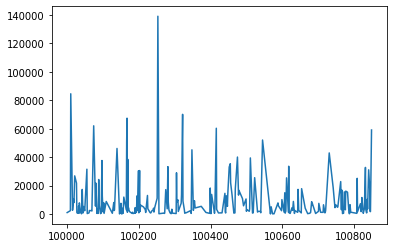

In [ ]:
plt.plot(MomCodeGroup)

#노출시간대비 주문량 높은 놈들

In [54]:
MomCodeGroup2 = train.groupby(['마더코드']).sum()

In [55]:
MomCodeGroup2['주문량/노출'] = MomCodeGroup2['주문량']/MomCodeGroup2['노출(분)']
MomCodeGroup2.sort_values('주문량/노출', ascending=False).head()

,Unnamed: 0,노출(분),상품코드,판매단가,취급액,요일,시,주문량,holiday,월,holiday(includeSS),실제_서울_최고기온,실제_서울_최저기온,실제_서울_강수량(mm),실제_서울_평균풍속(m/s),실제_수원_최고기온,실제_수원_최저기온,실제_수원_강수량(mm),실제_수원_평균풍속(m/s),실제_파주_최고기온,실제_파주_최저기온,실제_파주_강수량(mm),실제_파주_평균풍속(m/s),예보_서울_강수확률,예보_서울_강수량,예보_서울_하늘상태,예보_서울_일최고기온,예보_서울_일최저기온,예보_일산_강수확률,예보_일산_강수량,예보_일산_일최고기온,예보_일산_일최저기온,예보_수원_강수확률,예보_수원_강수량,예보_수원_일최고기온,예보_수원_일최저기온,계절,DATE,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥),MONTH,HOUR,주문량/노출
마더코드,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100492,75615,60.0,604461,149700,286104000,9,48,5733.547094,0,24,0,79.2,60.3,110.7,6.3,81.3,60.0,45.9,6.6,78.9,53.4,46.2,5.7,44.797297,2.763158,7.033784,82.578947,59.2500,28.175676,0.394737,80.526316,54.5625,40.135135,1.578947,82.578947,58.6875,6,60572487,83.88,60.24,0.10620,0.06084,1.500,0.01080,24,48,95.559118
100499,145080,120.0,1209006,239400,420256000,15,117,10532.731830,0,48,0,186.9,138.6,0.3,11.1,184.2,138.0,3.0,12.3,181.2,122.7,5.1,9.6,137.229730,6.907895,18.324324,183.315789,139.8750,120.000000,5.526316,177.000000,132.9375,133.986486,6.118421,180.473684,136.8750,12,121144908,136.44,83.28,0.19428,0.10164,2.532,0.02136,48,117,87.772765
100046,151203,60.0,1200756,185400,162001000,18,90,5242.750809,0,48,0,158.4,120.6,221.4,12.6,162.6,120.0,91.8,13.2,157.8,106.8,92.4,11.4,89.594595,5.526316,14.067568,165.157895,118.5000,56.351351,0.789474,161.052632,109.1250,80.270270,3.157895,165.157895,117.3750,12,121144974,167.76,120.48,0.21240,0.12168,3.000,0.02160,48,90,87.379180
100754,76092,60.0,606609,119700,187163000,15,39,4690.802005,0,24,3,86.7,55.5,0.0,5.4,83.1,52.2,0.0,5.1,83.1,46.5,0.0,2.7,66.689189,0.000000,9.668919,87.000000,60.9375,52.702703,0.000000,84.631579,54.1875,72.770270,0.394737,85.736842,59.2500,6,60572493,49.68,28.08,0.09552,0.05016,1.152,0.01020,24,39,78.180033
100323,151497,120.0,1208934,299400,452290000,21,99,9063.927856,0,48,3,177.3,126.3,0.0,11.4,171.3,120.3,0.0,10.2,170.4,107.4,0.0,6.6,142.297297,11.250000,18.729730,170.526316,124.6875,118.378378,12.631579,165.789474,114.9375,145.337838,11.447368,169.263158,122.0625,12,121144977,138.12,85.56,0.21396,0.11016,2.520,0.02136,48,99,75.532732


In [56]:
topcode = list(MomCodeGroup2.sort_values('주문량/노출', ascending=False).index[:50])

상품군내 마더코드별 주문량


In [57]:

multi_grouped = train.groupby(['상품군','마더코드'])
MultiGroup = multi_grouped['주문량'].sum()
MultiGroup = MultiGroup.reset_index()

In [58]:
item = list(set(MultiGroup['상품군']))

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45908 missing from current font.
  font.set_te

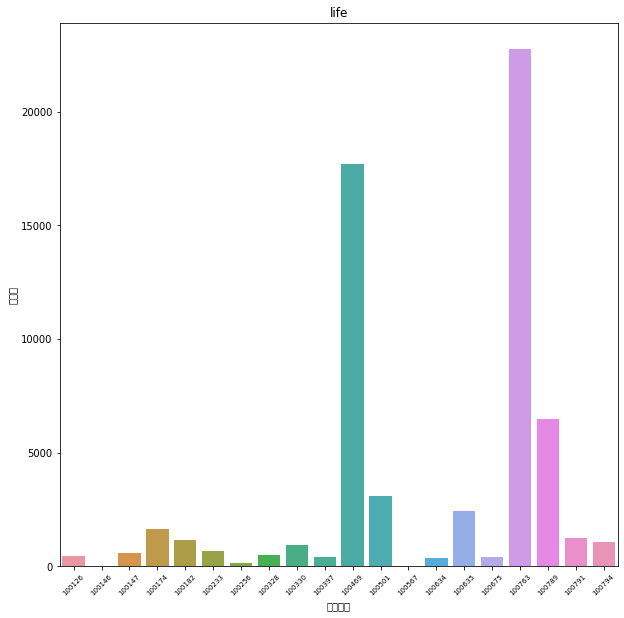

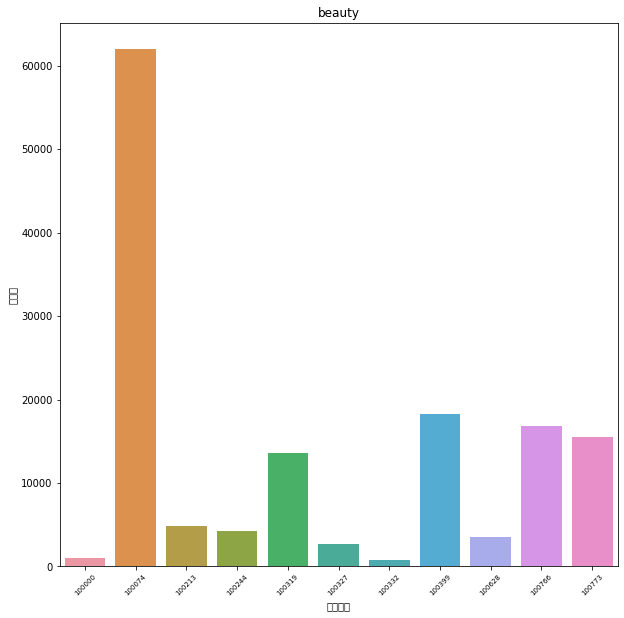

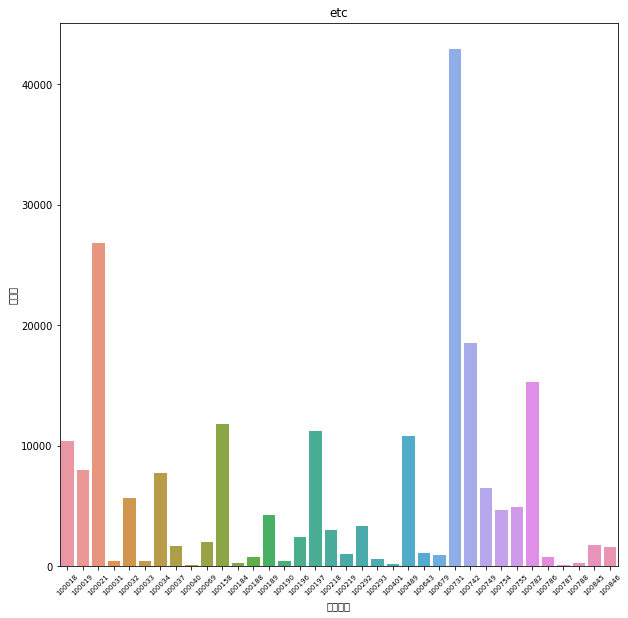

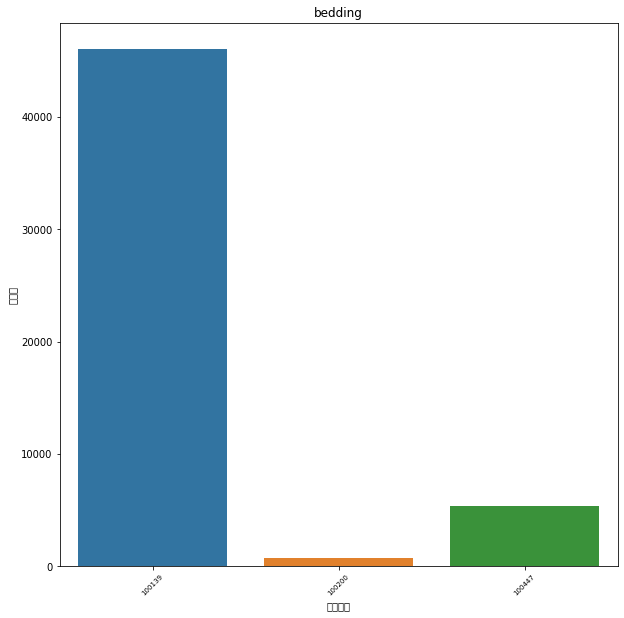

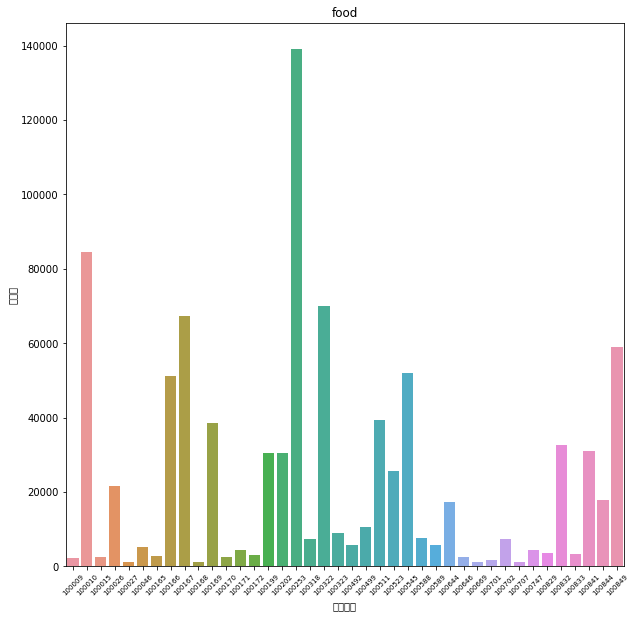

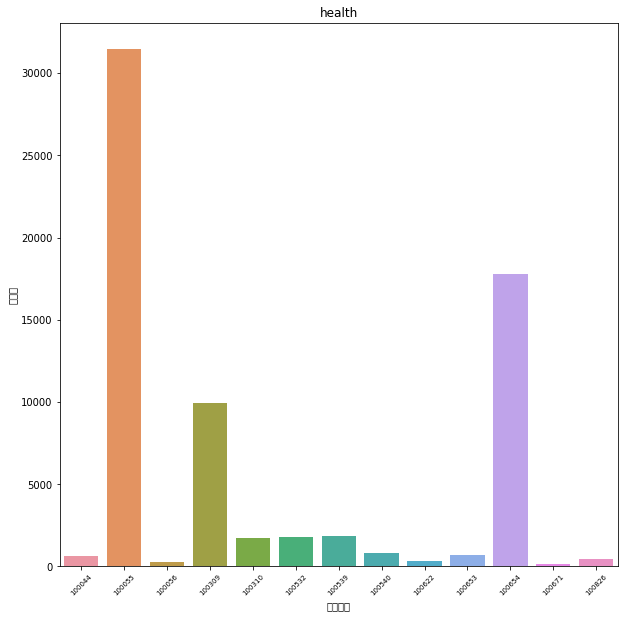

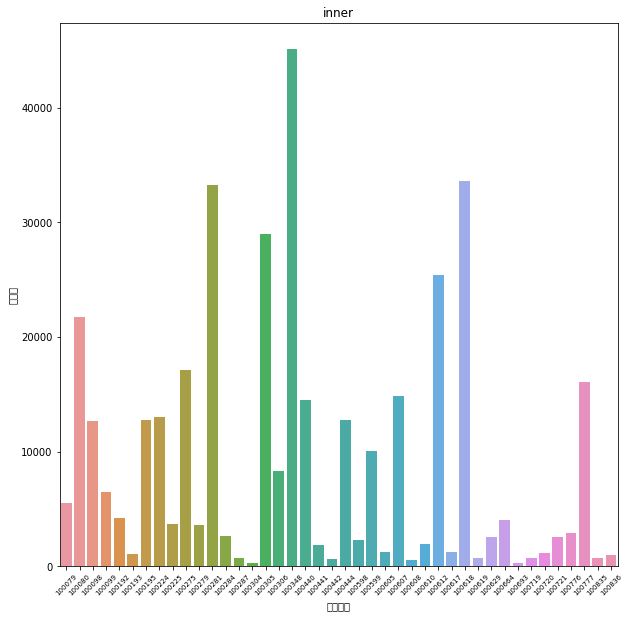

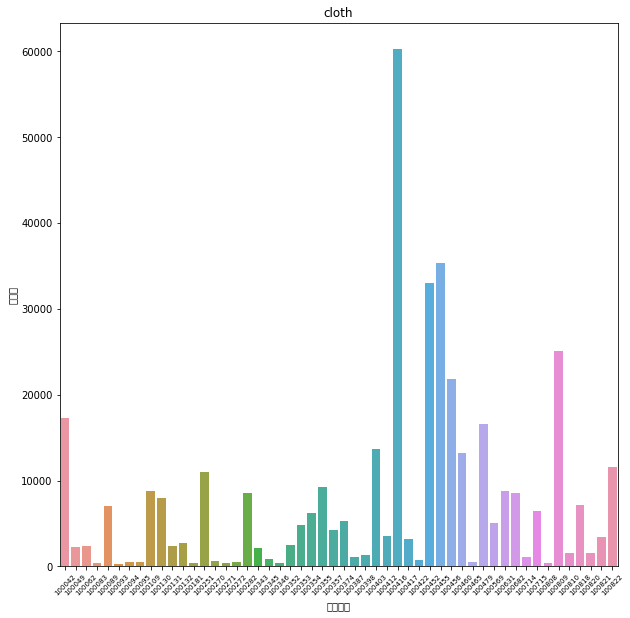

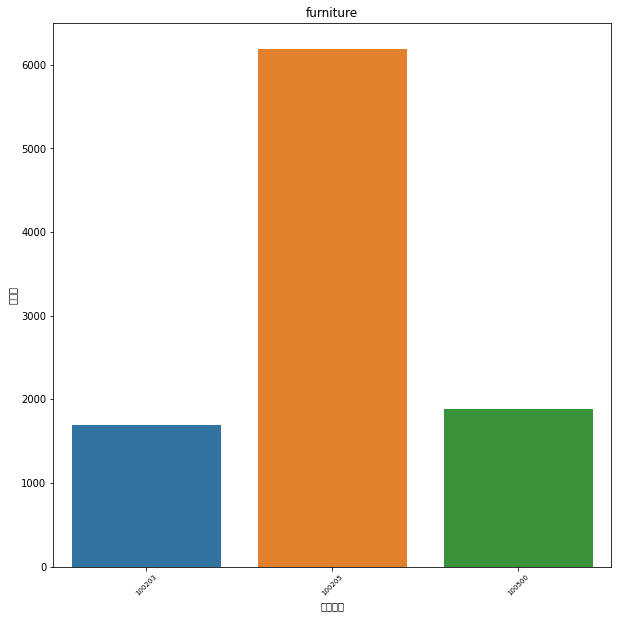

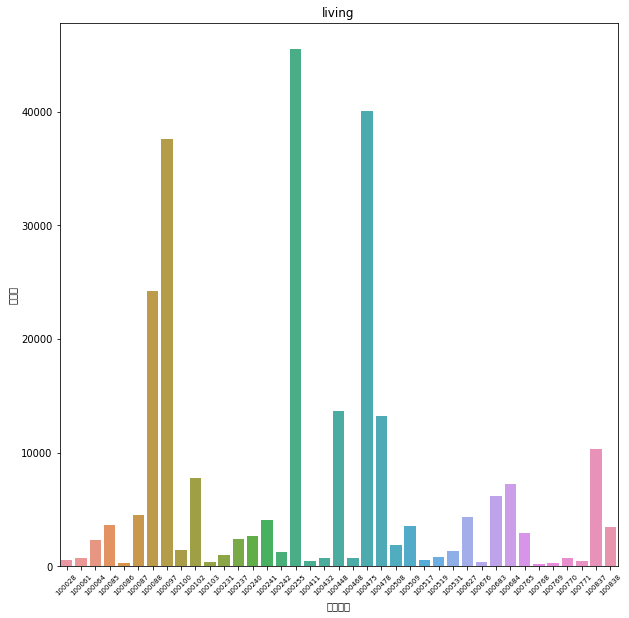

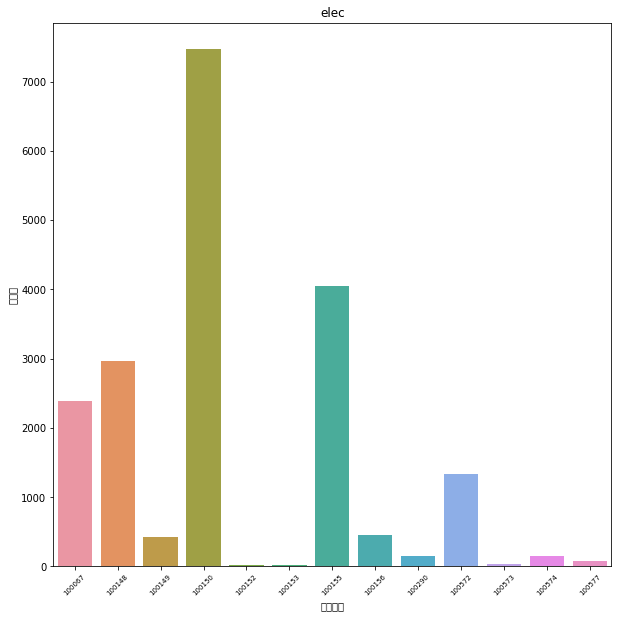

In [59]:
for i in item:
    plt.figure(figsize=(10,10))
    sns.barplot(data=MultiGroup[MultiGroup['상품군']==i], x='마더코드', y='주문량')
    plt.title(i)
    plt.xticks(rotation=45, size=7)

# 시간대별+상품군/마더코드별

In [60]:
hour_grouped = train.groupby(['시','상품군'])
HourGroup = hour_grouped['주문량'].sum()
HourGroup = HourGroup.reset_index()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_te

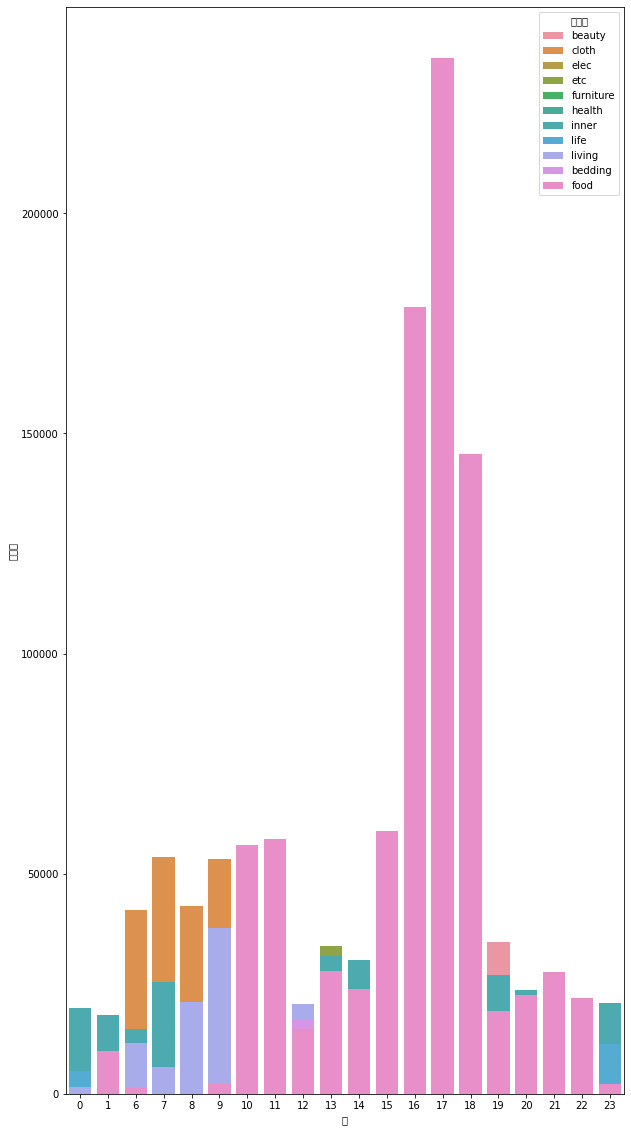

In [61]:
plt.figure(figsize=(10,20))
sns.barplot(data=HourGroup, x='시', y='주문량', hue='상품군', dodge=False)

#판매단가

In [62]:
np.corrcoef(train['주문량'],train['판매단가'])


array([[ 1.        , -0.39377501],
       [-0.39377501,  1.        ]])

In [63]:
np.corrcoef(train['주문량'],np.log(train['판매단가']))


array([[ 1.        , -0.61081947],
       [-0.61081947,  1.        ]])

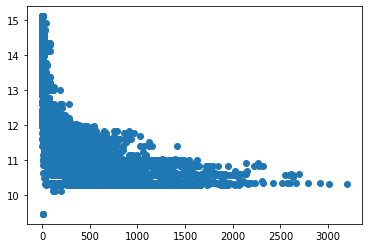

In [ ]:
plt.scatter(train['주문량'], np.log(train['판매단가']))

#시청률 데이터 EDA

In [67]:
watchdata = pd.read_excel('/content/drive/My Drive/빅콘폴더/2019시청률데이터.xlsx',header=1)

In [ ]:
watchdata

In [68]:
train_watch = watchdata.iloc[0:20,166:244].sum() # train에서 20분단위 시청률 합의 자료 (새벽2시~2시19분)
train_watch

2019-06-15    0.000
2019-06-16    0.000
2019-06-17    0.355
2019-06-18    0.000
2019-06-19    0.020
              ...  
2019-08-27    0.000
2019-08-28    0.040
2019-08-29    0.000
2019-08-30    0.000
2019-08-31    0.000
Length: 78, dtype: float64

In [69]:
(watchdata.iloc[0:20,166:244].sum()>0).sum() #78개중 31개만 20분단위 시청률이 0보다 큼

31

In [70]:
watch_day = watchdata.iloc[:,:-1].sum() #매일매일 모든 시간대에 대한 시청률 합계
watch_day

시간대           02:0002:0102:0202:0302:0402:0502:0602:0702:080...
2019-01-01                                                5.304
2019-01-02                                                8.018
2019-01-03                                                2.494
2019-01-04                                                 3.83
                                    ...                        
2019-12-27                                                5.589
2019-12-28                                                8.816
2019-12-29                                                6.451
2019-12-30                                                6.594
2019-12-31                                                7.076
Length: 366, dtype: object

In [71]:
train_watch = watchdata.iloc[:,166:244].sum() # train에서 모든 시간대 시청률 합의 자료
train_watch

2019-06-15     6.128
2019-06-16     4.556
2019-06-17     5.534
2019-06-18     5.163
2019-06-19     6.252
               ...  
2019-08-27     8.117
2019-08-28     7.986
2019-08-29     8.018
2019-08-30    12.467
2019-08-31     6.150
Length: 78, dtype: float64

In [72]:
hi = train.groupby(['DATE']).mean()['주문량']
hi

DATE
20190615    170.033046
20190616    350.118717
20190617    310.302305
20190618    398.498088
20190619    263.105269
               ...    
20190827    522.956852
20190828    530.107926
20190829    657.764898
20190830    504.389351
20190831    441.873591
Name: 주문량, Length: 78, dtype: float64

In [73]:
stats.linregress(train_watch,hi)

LinregressResult(slope=1.4971029372874778, intercept=329.0124183756924, rvalue=0.06169072167467972, pvalue=0.5915766066908947, stderr=2.778414468780406)

In [74]:
hello = pd.DataFrame()
hello['a'] = train_watch
hello['b'] = hi.values
hello

,a,b
2019-06-15,6.128,170.033046
2019-06-16,4.556,350.118717
2019-06-17,5.534,310.302305
2019-06-18,5.163,398.498088
2019-06-19,6.252,263.105269
...,...,...
2019-08-27,8.117,522.956852
2019-08-28,7.986,530.107926
2019-08-29,8.018,657.764898
2019-08-30,12.467,504.389351


Text(0, 0.5, 'Jumun Quantity')

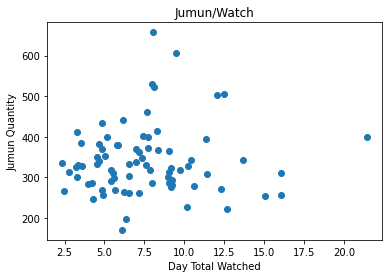

In [75]:
plt.scatter(hello['a'],hello['b']) 
plt.title("Jumun/Watch")
plt.xlabel("Day Total Watched")
plt.ylabel("Jumun Quantity")

# 모델 생성 및 훈련

In [76]:
y_train = train['주문량']
x_train = train.drop('주문량',axis=1)

In [77]:
x_train , y_train

(      Unnamed: 0                방송일시  노출(분)    마더코드  ...   분류 MONTH HOUR  DAY
 0          17373 2019-06-15 00:00:00   20.0  100305  ...   f1     6    0  sat
 1          17374 2019-06-15 00:20:00   20.0  100305  ...   f1     6    0  sat
 2          17375 2019-06-15 00:40:00   20.0  100305  ...   f1     6    0  sat
 3          17376 2019-06-15 01:00:00   30.0  100374  ...  g11     6    1  sat
 4          17377 2019-06-15 01:00:00   30.0  100374  ...  g11     6    1  sat
 ...          ...                 ...    ...     ...  ...  ...   ...  ...  ...
 8025       25398 2019-08-31 23:00:00   20.0  100205  ...   a1     8   23  sat
 8026       25399 2019-08-31 23:20:00   20.0  100292  ...  i29     8   23  sat
 8027       25400 2019-08-31 23:20:00   20.0  100292  ...  i29     8   23  sat
 8028       25401 2019-08-31 23:40:00   20.0  100292  ...  i29     8   23  sat
 8029       25402 2019-08-31 23:40:00   20.0  100292  ...  i29     8   23  sat
 
 [7513 rows x 56 columns], 0       138.798319
 1  

In [78]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=0)

In [80]:
Y_train

6824      4.300478
4869      6.792708
4036    500.314607
7540    872.367347
6027     20.240876
           ...    
5543    605.150754
5578      2.205333
5764      4.204403
923     505.441767
7782     62.262262
Name: 주문량, Length: 6010, dtype: float64

In [81]:
X_train.columns

Index(['Unnamed: 0', '방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가',
       '취급액', '날짜', '시간', '요일', '시', 'holiday', '월', 'holiday(includeSS)',
       '실제_서울_최고기온', '실제_서울_최저기온', '실제_서울_강수량(mm)', '실제_서울_평균풍속(m/s)',
       '실제_서울_날씨', '실제_수원_최고기온', '실제_수원_최저기온', '실제_수원_강수량(mm)',
       '실제_수원_평균풍속(m/s)', '실제_수원_날씨', '실제_파주_최고기온', '실제_파주_최저기온',
       '실제_파주_강수량(mm)', '실제_파주_평균풍속(m/s)', '실제_파주_날씨', '예보_서울_강수확률',
       '예보_서울_강수량', '예보_서울_하늘상태', '예보_서울_일최고기온', '예보_서울_일최저기온', '예보_일산_강수확률',
       '예보_일산_강수량', '예보_일산_일최고기온', '예보_일산_일최저기온', '예보_수원_강수확률', '예보_수원_강수량',
       '예보_수원_일최고기온', '예보_수원_일최저기온', '계절', 'DATE', '미세먼지(㎍/㎥)', '오존(ppm)',
       '이산화질소농도(ppm)', '일산화탄소농도(ppm)', '아황산가스농도(ppm)', '초미세먼지(㎍/㎥)', '분류',
       'MONTH', 'HOUR', 'DAY'],
      dtype='object')

In [82]:
X_train['분류']

6824    i10
4869     b6
4036     f5
7540     f3
6027     a1
       ... 
5543     i4
5578    i29
5764    i29
923      j4
7782    e18
Name: 분류, Length: 6010, dtype: object

# 빈도수로 인코딩(분류를, 마더코드 대신 쓸거임)

In [141]:
enc_nom_1 = (X_train.groupby('분류').size())/len(X_train)
enc_nom_1

분류
a1    0.039461
a2    0.020200
b1    0.016286
b2    0.022393
b3    0.020983
        ...   
j7    0.001253
j8    0.000940
j9    0.002505
k1    0.001253
k2    0.035860
Length: 83, dtype: float64

In [142]:
enc_nom_2 = (X_test.groupby('분류').size())/len(X_test)
enc_nom_2

분류
a1    0.047028
a2    0.023957
b1    0.023070
b2    0.026619
b3    0.014197
        ...   
j6    0.032831
j7    0.000887
j9    0.001775
k1    0.000887
k2    0.039042
Length: 76, dtype: float64

In [143]:
X_train['freq_enc_cate'] = X_train['분류'].apply(lambda x:enc_nom_1[x])
X_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,시간,요일,시,holiday,월,holiday(includeSS),실제_서울_최고기온,실제_서울_최저기온,실제_서울_강수량(mm),실제_서울_평균풍속(m/s),실제_서울_날씨,실제_수원_최고기온,실제_수원_최저기온,실제_수원_강수량(mm),실제_수원_평균풍속(m/s),실제_수원_날씨,실제_파주_최고기온,실제_파주_최저기온,실제_파주_강수량(mm),실제_파주_평균풍속(m/s),실제_파주_날씨,예보_서울_강수확률,예보_서울_강수량,예보_서울_하늘상태,예보_서울_일최고기온,예보_서울_일최저기온,예보_일산_강수확률,예보_일산_강수량,예보_일산_일최고기온,예보_일산_일최저기온,예보_수원_강수확률,예보_수원_강수량,예보_수원_일최고기온,예보_수원_일최저기온,계절,DATE,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥),분류,MONTH,HOUR,DAY,freq_enc_cate
904,18277,2019-06-24 00:20:00,20.0,100218,200769,일시불 썸덱스 트로이카 여행가방 10종세트,etc,149000,10410000,2019-06-24,00:20:00,0,0,0,6,0,30.9,20.9,0.0,1.9,맑음,30.7,19.2,0.0,2.0,맑음,30.0,16.6,0.0,1.2,구름조금,6.148649,0.000000,1.614865,31.894737,19.9375,6.081081,0.000000,30.210526,18.0000,4.391892,0.000000,31.736842,18.8750,2,20190624,20.96,12.72,0.03960,0.02196,0.328,0.00348,i1,6,0,mon,0.062950
4915,22288,2019-08-01 10:00:00,30.0,100786,202309,[루이띠에] 18K 베르니아 팔찌,etc,1350000,8707000,2019-08-01,10:00:00,3,10,0,8,0,30.1,23.5,26.9,1.7,구름많음/비/천둥번개,31.9,25.1,3.8,1.9,구름많음/비/안개,28.3,21.6,62.7,1.2,구름많음/비,7.006803,0.000000,1.700680,33.111111,25.0000,7.278912,0.000000,31.277778,24.0000,6.258503,0.133333,32.444444,25.0000,2,20190801,12.84,7.80,0.01600,0.01540,0.344,0.00328,i10,8,10,thu,0.023959
5955,23328,2019-08-11 07:20:00,20.0,100195,200655,레이프릴 오가닉 코튼 보정팬티 12종,inner,39900,45895000,2019-08-11,07:20:00,6,7,0,8,1,35.7,26.3,6.7,2.5,구름많음/비,35.3,25.5,4.8,4.9,구름많음/비,34.7,22.5,3.4,2.5,구름많음/비,45.405405,6.842105,3.628378,33.210526,26.1250,45.000000,9.934211,32.368421,25.0000,40.810811,5.789474,33.210526,25.6875,2,20190811,17.04,10.68,0.02448,0.00836,0.252,0.00332,f1,8,7,sun,0.021453
3912,21285,2019-07-22 14:00:00,20.0,100731,202132,월드컵 남성 에어러닝화+아쿠아트레킹화,etc,34800,14804000,2019-07-22,14:00:00,0,14,0,7,0,31.0,24.2,0.1,2.2,구름많음/안개/이슬비,31.7,24.3,0.0,1.2,구름많음/안개,31.2,23.2,0.0,1.6,구름많음,31.689189,1.250000,3.540541,31.157895,24.4375,31.216216,0.986842,29.157895,23.9375,31.621622,1.250000,31.210526,24.6250,2,20190722,42.96,33.00,0.04088,0.01792,0.428,0.00388,i4,7,14,mon,0.030066
5902,23275,2019-08-10 15:00:00,30.0,100786,202306,[루이띠에] 18K 베르니아 목걸이,etc,790000,3426000,2019-08-10,15:00:00,5,15,0,8,1,36.5,26.6,0.0,1.6,구름많음,36.3,25.6,0.0,2.5,구름조금,34.4,23.7,3.1,1.6,구름많음/비,37.162162,5.526316,2.831081,34.210526,26.0000,37.972973,7.368421,33.684211,24.9375,36.081081,4.657895,34.210526,25.3750,2,20190810,21.08,13.16,0.02764,0.01588,0.324,0.00352,i10,8,15,sat,0.023959


In [144]:
X_test['freq_enc_cate'] = X_test['분류'].apply(lambda x:enc_nom_2[x])
X_test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,시간,요일,시,holiday,월,holiday(includeSS),실제_서울_최고기온,실제_서울_최저기온,실제_서울_강수량(mm),실제_서울_평균풍속(m/s),실제_서울_날씨,실제_수원_최고기온,실제_수원_최저기온,실제_수원_강수량(mm),실제_수원_평균풍속(m/s),실제_수원_날씨,실제_파주_최고기온,실제_파주_최저기온,실제_파주_강수량(mm),실제_파주_평균풍속(m/s),실제_파주_날씨,예보_서울_강수확률,예보_서울_강수량,예보_서울_하늘상태,예보_서울_일최고기온,예보_서울_일최저기온,예보_일산_강수확률,예보_일산_강수량,예보_일산_일최고기온,예보_일산_일최저기온,예보_수원_강수확률,예보_수원_강수량,예보_수원_일최고기온,예보_수원_일최저기온,계절,DATE,미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),초미세먼지(㎍/㎥),분류,MONTH,HOUR,DAY,freq_enc_cate
1449,18822,2019-06-29 23:00:00,20.0,100148,200520,일시불 LG 울트라HD TV 70UK7400KNA,elec,2400000,5417000,2019-06-29,23:00:00,5,23,0,6,1,27.7,19.6,1.5,1.1,흐림/비/안개,26.0,20.0,3.9,1.4,구름많음/비/안개,26.1,19.0,0.8,0.8,흐림/비,12.702703,0.263158,2.175676,28.000000,20.5625,11.621622,0.000000,27.052632,19.5625,13.851351,0.131579,27.631579,20.5625,2,20190629,24.48,19.48,0.02956,0.01868,0.380,0.00348,b6,6,23,sat,0.064774
89,17462,2019-06-15 15:40:00,20.0,100290,200936,일시불 대우전자 벽걸이 에어컨 DOZ-S06JK,elec,459000,18622000,2019-06-15,15:40:00,5,15,0,6,1,27.4,17.9,2.1,2.5,구름조금/비/천둥번개,26.8,17.1,0.3,2.4,구름조금/소나기/안개,27.6,15.3,0.0,1.7,구름조금/비,10.337838,0.210526,1.925676,26.368421,17.0000,8.986486,0.078947,25.105263,16.0000,8.513514,0.078947,26.263158,16.0000,2,20190615,36.00,21.36,0.04308,0.01296,0.364,0.00300,b6,6,15,sat,0.064774
1185,18558,2019-06-27 11:20:00,20.0,100654,201977,무이자 종근당건강 락토핏 생유산균골드 단하루,health,79000,11286000,2019-06-27,11:20:00,3,11,0,6,0,31.2,21.9,1.4,1.4,흐림/비/안개,29.7,21.1,0.1,1.5,흐림/비/안개/이슬비,31.6,20.8,0.0,0.9,구름많음/비,29.459459,1.973684,3.628378,28.315789,21.0625,25.608108,0.000000,27.210526,20.0000,30.425676,1.973684,27.684211,20.7500,2,20190627,20.24,14.16,0.03936,0.01896,0.352,0.00316,c2,6,11,thu,0.004437
4548,21921,2019-07-28 10:40:00,20.0,100412,201305,이동수골프 여성 썸머 밴딩팬츠 3종,cloth,39000,23571000,2019-07-28,10:40:00,6,10,0,7,1,28.2,25.0,25.6,2.0,흐림/비/천둥번개,28.0,24.8,25.6,2.0,흐림/비/안개,26.4,23.7,58.8,1.8,흐림/비,30.337838,4.078947,3.479730,29.684211,24.9375,31.418919,4.605263,28.684211,24.0000,26.959459,2.236842,30.105263,25.0000,2,20190728,13.88,8.84,0.02392,0.01180,0.324,0.00320,g9,7,10,sun,0.026619
6017,23390,2019-08-11 19:30:00,30.0,100763,202220,일시불 2019년 타이거 충전식 무선 예초기,life,122000,9937000,2019-08-11,19:30:00,6,19,0,8,1,35.7,26.3,6.7,2.5,구름많음/비,35.3,25.5,4.8,4.9,구름많음/비,34.7,22.5,3.4,2.5,구름많음/비,45.405405,6.842105,3.628378,33.210526,26.1250,45.000000,9.934211,32.368421,25.0000,40.810811,5.789474,33.210526,25.6875,2,20190811,17.04,10.68,0.02448,0.00836,0.252,0.00332,e18,8,19,sun,0.039042


In [145]:
#X_train['마더코드'].isin(topcode)
X_train['topcode']= X_train['마더코드'].isin(topcode) #노출/대비주문량 상위50개 코드리스트(브랜드파워느낌)
X_test['topcode']= X_test['마더코드'].isin(topcode)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Feature선택

In [146]:
feature_selection = X_train.iloc[:,[2,7,11,13,14,31,32,33,34,36,37,38,40,41,42,54,56,57]].columns.values
feature_selection

array(['노출(분)', '판매단가', '요일', 'holiday', '월', '예보_서울_강수확률', '예보_서울_강수량',
       '예보_서울_하늘상태', '예보_서울_일최고기온', '예보_일산_강수확률', '예보_일산_강수량',
       '예보_일산_일최고기온', '예보_수원_강수확률', '예보_수원_강수량', '예보_수원_일최고기온', 'HOUR',
       'freq_enc_cate', 'topcode'], dtype=object)

In [147]:
shop_train_x = X_train[feature_selection]
shop_test_x = X_test[feature_selection]

In [148]:
forest.fit(shop_train_x, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [150]:
predictions = forest.predict(shop_train_x)
mape = mean_absolute_percentage_error(Y_train, predictions)
mape

91.84073216151332

In [107]:
some_data = X_train.iloc[:8] # 8개의 Data의 주문량 예측해 보겠음.
some_labels = Y_train.iloc[:8]
some_data = some_data[feature_selection]
print("예측", forest.predict(some_data))
print("레이블:", list(some_labels))

예측 [  4.1189857    8.827671   340.93220528 712.19112775  30.82385836
 363.41098743  36.56730771 965.01057558]
레이블: [4.30047846889952, 6.79270833333333, 500.314606741573, 872.367346938775, 20.2408759124087, 429.872495446265, 17.2635658914728, 1371.28762541806]
